In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data = data.drop(columns=('Type'))

In [4]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.shape

(178, 13)

In [7]:
min = MinMaxScaler()
value= min.fit_transform(data)

In [8]:
value

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [9]:
pca = PCA(n_components= 0.95)
pca_value= pca.fit_transform(value)

In [10]:
pca_value

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.13851902,
         0.11862666,  0.27744324],
       [-0.4849768 , -0.00882289, -0.28048205, ..., -0.18119338,
         0.02806622,  0.11494849],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.02317846,
        -0.2221326 , -0.01727012],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ..., -0.03713893,
        -0.00146496,  0.07354422],
       [ 0.5729911 , -0.42551609, -0.09453672, ..., -0.02466179,
         0.01139898,  0.19659748],
       [ 0.701764  , -0.51350498,  0.29390996, ...,  0.11174192,
         0.10294569, -0.0509633 ]])

In [11]:
pca_value.shape

(178, 10)

In [12]:
print(pca.explained_variance_ratio_*100)

[40.74948456 18.97035178  8.56167062  7.4266778   5.5653011   4.65883719
  3.66392891  2.4087893   2.27437053  2.25096456]


In [13]:
print(np.cumsum(np.round(pca.explained_variance_ratio_*100,2)))

[40.75 59.72 68.28 75.71 81.28 85.94 89.6  92.01 94.28 96.53]


In [14]:
pca.components_

array([[-0.13336766,  0.24851581, -0.00073917,  0.17783862, -0.08865728,
        -0.39507087, -0.41458979,  0.33310861, -0.2529021 ,  0.09232904,
        -0.25113726, -0.4734921 , -0.28686211],
       [-0.55088368, -0.22739058, -0.1630912 ,  0.07977633, -0.18816566,
        -0.07414473, -0.00100692, -0.00996037, -0.03141788, -0.5197075 ,
         0.23720622,  0.21556225, -0.44388836],
       [-0.08384838,  0.49203927,  0.40300937,  0.47724241,  0.0065507 ,
         0.25306514,  0.19610546,  0.28598186,  0.22834235, -0.03309997,
        -0.10658878,  0.29777629, -0.15196829],
       [-0.04032815,  0.48603202, -0.24197565, -0.08169399,  0.01588017,
        -0.05264323, -0.02703323, -0.70909528,  0.07657367, -0.02632204,
        -0.35249801,  0.08206201, -0.2297925 ],
       [-0.27801009, -0.41288996,  0.2863938 ,  0.41830488,  0.47089872,
        -0.01802978,  0.00257298, -0.36003786,  0.14866588,  0.20058243,
        -0.07716208, -0.26339648, -0.0765558 ],
       [-0.13725432, -0.213102

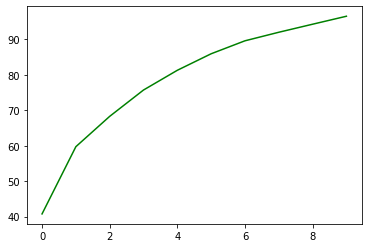

In [15]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_*100,2)),color='green')


In [16]:
pca_df = pd.DataFrame(pca_value[:,0:3],columns=('pc1','pc2','pc3'))

In [17]:
pca_df

,pc1,pc2,pc3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


In [18]:
pca_arr = pca_df.values

In [19]:
df = pd.concat([pd.DataFrame(pca_value[:,0:3],columns=['pc1','pc2','pc3']),data],axis=1)


In [20]:
df.head(10)

,pc1,pc2,pc3,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-0.706336,-0.253193,0.024093,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,-0.484977,-0.008823,-0.280482,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,-0.521172,-0.189187,0.196217,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,-0.821644,-0.580906,0.081110,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,-0.202546,-0.059467,0.300240,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,-0.608190,-0.487519,-0.075433,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,-0.544047,-0.300196,-0.105075,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,-0.474357,-0.298197,-0.002821,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,-0.500432,-0.307603,-0.230494,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,-0.627518,-0.206328,-0.114148,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Clustering on PCA Components using heirarchial Clustering

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [12.5, 12.5, 40.0, 40.0], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [115.0, 115.0, 125.0, 125.0], [135.0, 135.0, 145.0, 145.0], [120.0, 120.0, 140.0, 140.0], [155.0, 155.0, 165.0, 165.0], [185.0, 185.0, 195.0, 195.0], [175.0, 175.0, 190.0, 190.0], [160.0, 160.0, 182.5, 182.5], [130.0, 130.0, 171.25, 171.25], [92.5, 92.5, 150.625, 150.625], [62.5, 62.5, 121.5625, 121.5625], [26.25, 26.25, 92.03125, 92.03125], [215.0, 215.0, 225.0, 225.0], [205.0, 205.0, 220.0, 220.0], [235.0, 235.0, 245.0, 245.0], [255.0, 255.0, 265.0, 265.0], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [260.0, 260.0, 282.5, 282.5], [315.0, 315.0, 325.0, 325.0], [305.0, 305.0, 320.0, 320.0], [335.0, 335.0, 345.0, 345.0], [375.0, 375.0, 385.0, 385.0], [365.0, 365.0, 380.0, 380.0], [355.0, 355.0, 372.5, 372.5], [340.0, 340.0, 363.75, 363.75], [312.5, 312.

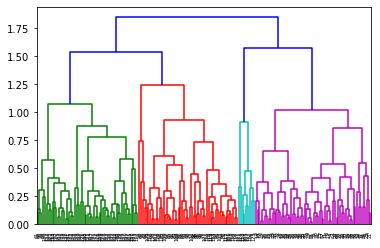

In [21]:
dendogram = sch.dendrogram(sch.linkage(pca_arr,method='complete',metric='euclidean'))
print(dendogram)

In [22]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean')

In [23]:
pred = hc.fit_predict(pca_df)

In [24]:
df['Cluster_hierarchy'] = pred

In [25]:
df

,pc1,pc2,pc3,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_hierarchy
0,-0.706336,-0.253193,0.024093,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-0.484977,-0.008823,-0.280482,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,-0.521172,-0.189187,0.196217,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,-0.821644,-0.580906,0.081110,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,-0.202546,-0.059467,0.300240,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,0.581781,-0.348366,0.083590,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,0.626313,-0.546857,-0.030495,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,0.572991,-0.425516,-0.094537,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [26]:
df['Cluster_hierarchy'].value_counts()

0    61
2    54
1    49
3    14
Name: Cluster_hierarchy, dtype: int64

Clustering on PCA Components using K-Means Clustering

In [27]:
wcss = []
for i in range(1,12):
  kmeans=KMeans(i)
  kmeans.fit_transform(pca_df)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Plot')

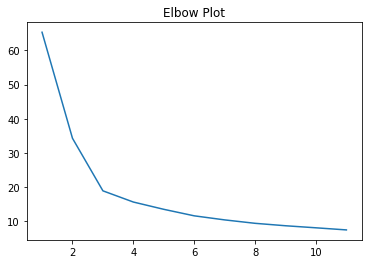

In [28]:
plt.plot(range(1,12),wcss)
plt.title('Elbow Plot')

In [55]:
for i in range(2,12):
  kmean_0 = KMeans(n_clusters=i,n_jobs=-1,random_state=0)
  k = kmean_0.fit_predict(pca_df)
  sil_score = silhouette_score(pca_df,k)
  print('for n_cluster=', i,'The silhouette_score=',sil_score)

for n_cluster= 2 The silhouette_score= 0.43235189362905224
for n_cluster= 3 The silhouette_score= 0.47796626568347655
for n_cluster= 4 The silhouette_score= 0.4148335666566664
for n_cluster= 5 The silhouette_score= 0.35569158236525894
for n_cluster= 6 The silhouette_score= 0.3829421871779117
for n_cluster= 7 The silhouette_score= 0.3185608820090304
for n_cluster= 8 The silhouette_score= 0.3131862273306893
for n_cluster= 9 The silhouette_score= 0.31050157711306686
for n_cluster= 10 The silhouette_score= 0.2850983307471146
for n_cluster= 11 The silhouette_score= 0.27841143647540306


From elbow Plot and silhouette score we can see the number of clusters is 3.

In [29]:
clusters = KMeans(n_clusters=3,n_jobs=-1,max_iter=500)
clust= clusters.fit_predict(pca_df)

In [30]:
clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [31]:
df['Cluster_kmeans'] = clust

In [32]:
df.head(10)

,pc1,pc2,pc3,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_hierarchy,Cluster_kmeans
0,-0.706336,-0.253193,0.024093,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,-0.484977,-0.008823,-0.280482,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,-0.521172,-0.189187,0.196217,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,-0.821644,-0.580906,0.081110,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,-0.202546,-0.059467,0.300240,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3,1
5,-0.608190,-0.487519,-0.075433,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0,1
6,-0.544047,-0.300196,-0.105075,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0,1
7,-0.474357,-0.298197,-0.002821,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0,1
8,-0.500432,-0.307603,-0.230494,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0,1
9,-0.627518,-0.206328,-0.114148,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0,1


In [33]:
df['Cluster_kmeans'].value_counts()

1    65
2    62
0    51
Name: Cluster_kmeans, dtype: int64

Performing Cluster on original Data using Hierarchy Clustering

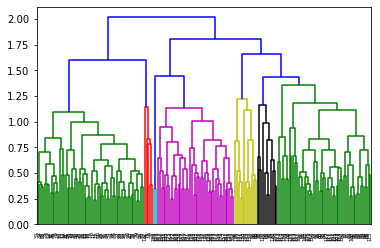

In [34]:
dendogram1 = sch.dendrogram(sch.linkage(value,method='complete',metric='euclidean'))

In [41]:
hc1 = AgglomerativeClustering(n_clusters=4,linkage='complete',affinity='euclidean')
hc1.fit_predict(value)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
data['hierarchy_cluster'] = hc1.fit_predict(value)

In [43]:
data.head(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hierarchy_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


In [44]:
data['hierarchy_cluster'].value_counts()

0    62
1    61
2    43
3    12
Name: hierarchy_cluster, dtype: int64

In [45]:
data.groupby('hierarchy_cluster').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
hierarchy_cluster,,,,,,,,,,,,,
0,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806
1,12.214262,1.938361,2.226557,20.213115,92.967213,2.253934,2.110000,0.356721,1.707705,2.976721,1.059115,2.852623,510.049180
2,13.215349,3.537674,2.447674,21.558140,98.139535,1.700000,0.785349,0.462093,1.181163,7.508605,0.681628,1.742791,623.651163
3,12.619167,1.804167,2.232500,18.450000,103.750000,1.745000,0.995000,0.398333,0.871667,4.749167,0.854167,1.605833,610.833333


Performing Clustering on original data using K-Means Clustering

In [46]:
wcss1 = []
for i in range(1,11):
  kmeans1 = KMeans(n_clusters=i)
  kmeans1.fit(value)
  wcss1.append(kmeans1.inertia_)

Text(0.5, 1.0, 'Elbow Plot')

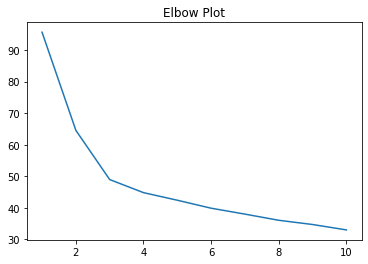

In [47]:
plt.plot(range(1,11),wcss1)
plt.title('Elbow Plot')

In [56]:
for i in range(2,12):
  kmean_1 = KMeans(n_clusters=i,n_jobs=-1,random_state=0)
  k1 = kmean_1.fit_predict(value)
  sil_score1 = silhouette_score(value,k1)
  print('for n_cluster=', i,'The silhouette_score=',sil_score1)

for n_cluster= 2 The silhouette_score= 0.29872218159747743
for n_cluster= 3 The silhouette_score= 0.3013463273503232
for n_cluster= 4 The silhouette_score= 0.25993667561623146
for n_cluster= 5 The silhouette_score= 0.2437817188094557
for n_cluster= 6 The silhouette_score= 0.17585039520298734
for n_cluster= 7 The silhouette_score= 0.15064028137247804
for n_cluster= 8 The silhouette_score= 0.16772468535054985
for n_cluster= 9 The silhouette_score= 0.13664477931953317
for n_cluster= 10 The silhouette_score= 0.13678233699090814
for n_cluster= 11 The silhouette_score= 0.1323886701408956


From elbow plot and silhouette score we can see the number of cluster is 3.

In [57]:
clusters1 = KMeans(n_clusters=3,n_jobs=-1,max_iter=500)
clusters1.fit_predict(value)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [58]:
data['K-means_cluster'] = clusters1.fit_predict(value)

In [59]:
data.head(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hierarchy_cluster,K-means_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0,1


In [60]:
data['K-means_cluster'].value_counts()

2    62
1    61
0    55
Name: K-means_cluster, dtype: int64

In [61]:
data.groupby('K-means_cluster').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hierarchy_cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
K-means_cluster,,,,,,,,,,,,,,
0,13.099818,3.160909,2.407455,21.043636,98.654545,1.689818,0.847818,0.457818,1.133636,6.936545,0.716836,1.709273,624.854545,2.145455
1,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,0.016393
2,12.213226,1.938710,2.244355,20.298387,92.790323,2.293871,2.152581,0.348226,1.669839,3.011452,1.062419,2.877903,497.274194,1.032258
